In [1]:
from kerax.layers import Conv2D, Dense, Flatten, Input, BatchNormalization, Activation, Add, MaxPool2D
from kerax.models import Model, Sequential
from kerax.losses import CategoricalCrossEntropy
import numpy as np
from kerax import activations
from kerax.utils import to_categorical
from jax.random import PRNGKey
import pandas as pd
import matplotlib.pyplot as plt
from jax import vmap

In [2]:
dataset = pd.read_csv('../mnist_train.csv')

In [3]:
label = dataset['label'].values
dataset.drop('label', axis=1, inplace=True)

In [4]:
train_x = dataset.values.reshape((-1, 28, 28, 1))

In [5]:
train_x = train_x.astype('float32') / 255.0

In [6]:
label = to_categorical(label, num_classes=10)

/home/hazem/miniconda3/envs/jax/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:5794: UserWarning: Explicitly requested dtype int requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


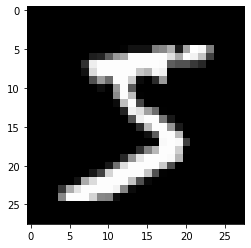

In [7]:
plt.imshow(train_x[0], cmap='gray')

In [8]:
inputs = Input((28, 28, 1))
conv1 = Conv2D(64, 3, activation=activations.ReLU, key=PRNGKey(100))(inputs)
act1 = Activation('relu')(conv1)
conv3 = Conv2D(128, 3, padding='same', key=PRNGKey(104))(act1)
act2 = Activation('relu')(conv3)
conv4 = Conv2D(128, 3, padding='same', key=PRNGKey(105))(act2)
flatten = Flatten()(conv4)
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(10, activation='softmax')(dense1)


In [9]:
model = Model(input=inputs, output=dense2)

In [10]:
model(np.expand_dims(train_x[0], 0))

DeviceArray([[0.10060257, 0.09827464, 0.09438653, 0.10927843, 0.10035025,
              0.09505975, 0.09583262, 0.09865228, 0.10251758, 0.1050453 ]],            dtype=float32)

In [11]:
model.compile('categorical_crossentropy', 'adam')

In [12]:
model.fit(train_x, label, epochs=10, batch_size=64)

100%|████████████████████████████████████████| 64/64 [00:01<00:00, 46.52it/s, loss=0.011449343, remaining_epochs=0]


In [18]:
from kerax.utils import to_numbers
acc = 0
for image, label in zip(train_x,  label):
    res = model(np.expand_dims(image, 0))
    print(res.shape)
    if np.argmax(res) == label:
        acc += 1

print(acc / train_x.shape[0])

()


TypeError: zip argument #2 must support iteration